In [601]:
import numpy as np
import pandas as pd
import scipy.interpolate as inter
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy import signal
from scipy import constants
import scipy.optimize as opt

def get_median_filtered(signal, threshold=5):
    signal = signal.copy()
    difference = np.abs(signal - np.median(signal))
    median_difference = np.median(difference)
    if median_difference == 0:
        s = 0
    else:
        s = difference / float(median_difference)
    mask = s > threshold
    signal[mask] = np.median(signal)
    return signal
def throughoutOutliers(data):
    count =0
    return data
def bandmodle(T,E,C):
    
    k=constants.physical_constants["Boltzmann constant in eV/K"][0]
    L=8.509e-3
    A=np.pi* (3.048e-3/2)**2
    return ((C)*np.exp(E/(k*T)))
def linemodel(x,m,b):
    return (m*x+b)

In [602]:
current=9.867e-6

trail1 =np.loadtxt("norm/1011_RXC.txt",) ## not good carbon data
#trail1[0]=throughoutOutliers(trail1[0])
#trail1[1]=throughoutOutliers(trail1[1])
#trail1[2]=throughoutOutliers(trail1[2])
#trail1[3]=throughoutOutliers(trail1[3])
trail2 =np.loadtxt("norm/1013_RXC.txt",)
trail2[0]=throughoutOutliers(trail2[0])
trail2[1]=throughoutOutliers(trail2[1])
trail2[2]=throughoutOutliers(trail2[2])
trail2[3]=throughoutOutliers(trail2[3])

trail3 =np.loadtxt("norm/1013_RXCa.txt",)
trail3[0]=throughoutOutliers(trail3[0])
trail3[1]=throughoutOutliers(trail3[1])
trail3[2]=throughoutOutliers(trail3[2])
trail3[3]=throughoutOutliers(trail3[3])



trail4 =np.loadtxt("norm/1016_RXC.txt",)
#trail4[0]=get_median_filtered(trail4[0],4)
trail4[1]=throughoutOutliers(trail4[1])
trail4[2]=throughoutOutliers(trail4[2])
trail4[3]=throughoutOutliers(trail4[3])




trail5 =np.loadtxt("norm/1016_RXCb.txt",)
trail5[0]=throughoutOutliers(trail5[0])
trail5[1]=throughoutOutliers(trail5[1])
trail5[2]=throughoutOutliers(trail5[2])
trail5[3]=throughoutOutliers(trail5[3])


trails1 =np.loadtxt("norm/1017_RXC_super1.txt",)
trails2 =np.loadtxt("norm/1017_RXC_super2.txt",)
trails3 =np.loadtxt("norm/1017_RXC_super3.txt",)
throughout=100
dunktrail=[None,trail1[::,throughout::],trail2[::,throughout::],trail3[::,throughout::],trail4[::,throughout::],trail5[::,throughout::]]

In [603]:
tempconversion=np.flip(pd.read_csv("Si_Diode_Specs_New.csv", header=None).to_numpy().T,axis=1)


tempconspline= inter.InterpolatedUnivariateSpline(tempconversion[1],tempconversion[0])


In [604]:
trail=1
takepoints=1
xrange=np.arange(0,len(dunktrail[trail][0][np.where(dunktrail[trail][0]>-2)])*.4,.4)
temp=tempconspline(dunktrail[trail][0][np.where(dunktrail[trail][0]>-2)])
firstspline= inter.InterpolatedUnivariateSpline(xrange,temp)
secondspline= inter.InterpolatedUnivariateSpline(xrange[2::takepoints],(dunktrail[trail][1][np.where(dunktrail[trail][0]>-2)]/-current)[2::takepoints])
thirdspline= inter.InterpolatedUnivariateSpline(xrange[::takepoints],(savgol_filter(dunktrail[trail][2][np.where(dunktrail[trail][0]>-2)]/-current,55,1))[::takepoints])
fourthspline=inter.InterpolatedUnivariateSpline(xrange[2::takepoints],(dunktrail[trail][3][np.where(dunktrail[trail][0]>-2)]/current)[2::takepoints])
splines=[firstspline,secondspline,thirdspline,fourthspline]

Text(0.5, 1.0, 'Iron')

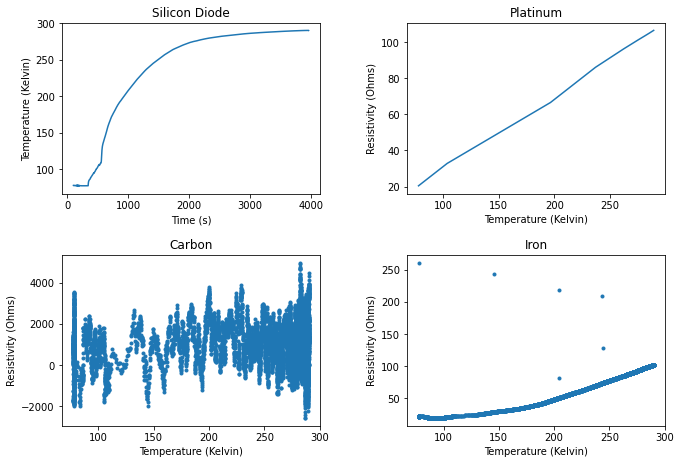

In [605]:
xfinerange=np.arange(throughout,len(dunktrail[trail][0])*.4,.4)
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=1.5)
fig.subplots_adjust(bottom=0.1, right=1.5, top=1.5)
ax[0][0].plot(xfinerange,splines[0](xfinerange))
ax[0][0].set_ylabel("Temperature (Kelvin)")
ax[0][0].set_xlabel("Time (s)")
ax[0][0].set_title("Silicon Diode")
ax[0][1].plot(splines[0](xfinerange)[::1000],splines[1](xfinerange)[::1000])
ax[0][1].set_ylabel("Resistivity (Ohms)")
ax[0][1].set_xlabel("Temperature (Kelvin)")
ax[0][1].set_title("Platinum")
ax[1][0].plot(splines[0](xfinerange),splines[2](xfinerange),".")
ax[1][0].set_ylabel("Resistivity (Ohms)")
ax[1][0].set_xlabel("Temperature (Kelvin)")
ax[1][0].set_title("Carbon")
ax[1][1].plot(splines[0](xfinerange)[100::],splines[3](xfinerange)[100::],".")
ax[1][1].set_ylabel("Resistivity (Ohms)")
ax[1][1].set_xlabel("Temperature (Kelvin)")
ax[1][1].set_title("Iron")

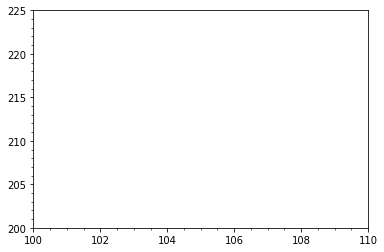

In [606]:
p,C=opt.curve_fit(linemodel,splines[0](xfinerange)[850:1000:],splines[3](xfinerange)[850:1000:] 
                  ,absolute_sigma=True)
bottom=np.min(splines[3](xfinerange)[np.where(splines[0](xfinerange)[200:410])] )
plt.minorticks_on()
plt.xlim(100,110)
plt.ylim(200,225)
plt.hlines(bottom,100,110)
plt.plot(splines[0](xfinerange)[100::],linemodel(splines[0](xfinerange)[100::],p[0],p[1]))
plt.plot(splines[0](xfinerange)[100::],splines[3](xfinerange)[100::],".")


In [607]:
sigp = np.sqrt(np.diag(C))
sigp[0]

0.033897803893001996

[-1.20580847e-12 -8.31692970e-04] 1.7999207035181384e-07


Text(0.5, 1.0, 'Platinum')

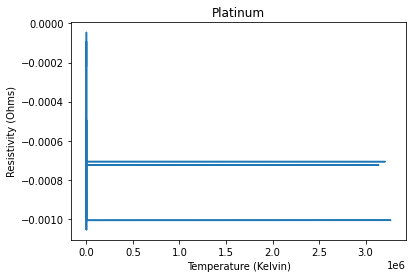

In [608]:
xrange=np.arange(0,len(dunktrail[trail][0][np.where(dunktrail[trail][0]>-2)])*.4,.4)
sortedlist=splines[0](xrange)[500::takepoints]
np.sort(sortedlist)
aspline=inter.InterpolatedUnivariateSpline(xrange[500::takepoints],splines[1](xrange)[500::takepoints])

p,C=opt.curve_fit(linemodel,tempconspline(dunktrail[trail][0]),dunktrail[trail][1] 
                  ,absolute_sigma=True)

xrange2= np.arange(0,100,.4)
sigp = np.sqrt(np.diag(C))
print(p,sigp[0])
plt.plot(tempconspline(dunktrail[trail][0]),dunktrail[trail][1] )
plt.plot(splines[0](xfinerange)[850:950],linemodel(xfinerange,p[0],p[1])[850:950])
plt.ylabel("Resistivity (Ohms)")
plt.xlabel("Temperature (Kelvin)")
plt.title("Platinum")


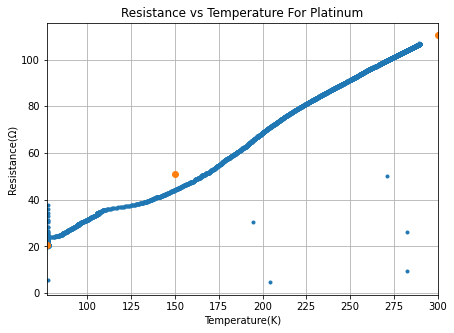

In [609]:
arr1 = [77,150,300]
arr2 = [20.38,50.788,110.354]
temp=(tempconspline(dunktrail[trail][0]))

fplat = dunktrail[trail][1]/current
# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
ax.plot(temp, -fplat, ".")
ax.plot(arr1, arr2,marker="o", ls="")
# set the basic properties
ax.set_ylabel('Resistance(Ω)')
ax.set_xlabel('Temperature(K)')
ax.set_title('Resistance vs Temperature For Platinum')

# set the limits
ax.set_xlim(77, 300)
#ax.set_ylim(6, 24)

# set the grid on
ax.grid('on')

28.263999999999385
-2.5875133381993045
77.79816664673062
0.010045312793520264
33.60784131355437


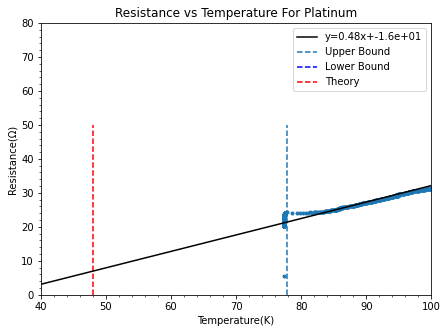

In [610]:
p, C = opt.curve_fit(linemodel, (temp)[450:1000], -fplat[450:1000], absolute_sigma=True)
sigp = np.sqrt(np.diag(C))
m = p[0]
b = p[1]
err = sigp[0]
x = np.arange(28, 150, 0.0001)
# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
ax.plot(temp[550:], -fplat[550:], ".")
ax.plot(x, linemodel(x, m, b), "k", label =f"y={m:.2}x+{b:.2}")
lowerbound=opt.brentq(lambda x: linemodel(x,m,b),30,50)




# set the basic properties
ax.set_ylabel('Resistance(Ω)')
ax.set_xlabel('Temperature(K)')
ax.set_title('Resistance vs Temperature For Platinum')

# set the limits
ax.set_xlim(40, 100)
ax.set_ylim(0, 80)

# set the grid on
ax.minorticks_on()
ax.vlines(temp[400:][0], 0, 50, linestyles="dashed",label="Upper Bound")

ax.vlines(lowerbound, 0, 50, linestyles="dashed", label="Lower Bound",colors="blue")

ax.vlines(48, 0, 50, linestyles="dashed",colors="red",label="Theory")
plt.legend()
t = 2640
print(x[t])
print(linemodel(x, m, b)[t])
print(temp[400:][0])
print(err)
print(lowerbound)

In [636]:
xfinerange=np.arange(throughout,len(dunktrail[trail][0])*.4,.4)
splines[3](xfinerange)[5000::]

array([ 93.0803081 ,  93.09521638,  93.09430425, ..., 102.21459463,
       102.36937478, 102.6703205 ])

In [637]:
xfinerange=np.arange(throughout,len(dunktrail[trail][0])*.4,.4)
p,C=opt.curve_fit(linemodel,splines[0](xfinerange)[5000:6000:],splines[3](splines[0](xfinerange)[5000:6000:]) ,absolute_sigma=True)

sigp = np.sqrt(np.diag(C))

print(p[0],sigp[0])

0.0005098320026110104 0.017220065560422337


In [638]:
mini=opt.brentq(lambda x: linemodel(x,p[0],p[1]),70,90)
maxi=opt.brentq(lambda x: splines[3](x)-linemodel(x,p[0],p[1]),90,190)
maxi,mini

ValueError: f(a) and f(b) must have different signs

Text(0.5, 1.0, 'Iron')

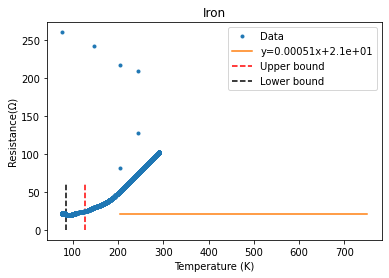

In [639]:
xfinerange=np.arange(throughout,len(dunktrail[trail][0])*.4,.4)
plt.plot(splines[0](xfinerange)[::],splines[3](xfinerange)[::],".",label="Data")
xfinerange=np.arange(-20,1500,1000)
plt.plot(splines[0](xfinerange),linemodel(splines[0](np.linspace(0,200,len(xfinerange))),p[0],p[1]),label=f"y={p[0]:.2}x+{p[1]:.2}")
plt.vlines(maxi,0,60,linestyles="dashed",colors="red",label="Upper bound")
plt.vlines(mini,0,60,linestyles="dashed",colors="black",label="Lower bound")
#plt.ylim(0,50)
#plt.xlim(70,200)
plt.legend()
plt.ylabel("Resistance(Ω)")
plt.xlabel("Temperature (K)")
plt.title("Iron")

In [599]:
def bandmodle(T,E,C):
    
    k=constants.physical_constants["Boltzmann constant in eV/K"][0]
    L=8.509e-3
    A=np.pi* (3.048e-3/2)**2
    return E/(k*T)+C

In [600]:
splines[0](xfinerange)[780]

IndexError: index 780 is out of bounds for axis 0 with size 2

In [ ]:
L=8.509e-3
A=np.pi* (3.048e-3/2)**2
k=constants.physical_constants["Boltzmann constant in eV/K"][0]
    
p,C=opt.curve_fit(bandmodle,splines[0](xfinerange),k*np.log(L*splines[2](xfinerange)/A),absolute_sigma=True)
sigp = np.sqrt(np.diag(C))
print(p[0],sigp[0])

In [ ]:
Trails=100000000
randomg1=np.random.choice(splines[0](xfinerange)[800::],Trails)
randomg2=np.random.choice(splines[0](xfinerange)[:500:],Trails)


In [ ]:
np.max(randomg1)

In [ ]:
def bangEnergy(t_1,t_2,r_1,r_2):
    return((k*np.log(r_1/r_2))/(t_1-t_2))

In [ ]:
Eg= bangEnergy(randomg1,randomg2,splines[2](randomg1),splines[2](randomg2))
np.mean(Eg),np.std(Eg)

In [ ]:
plt.hist(Eg,bins=100)

In [ ]:
xrange=np.arange(-8,10,.4)
plt.plot(xrange,splines[0](xrange))

In [ ]:
opt.brentq(lambda x: splines[0](x),-8,-7)

In [ ]:
splines[0](380)